In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import percentile
from numpy import median
from numpy import abs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [2]:
# Charger le fichier de données dans un dataframe
#df = pd.read_csv('dataset_complet_Naftal.csv', sep=';', encoding='utf-8')
# Obtenir un aperçu des données
#df.head()

# charger le dataset dans un DataFrame sans nom de colonnes
df = pd.read_csv('dataset_complet.csv',sep=';', encoding='utf-8', header=None)

# renommer les colonnes en leur attribuant des noms
df = df.rename(columns={0: 'DimDistrictFK', 1: 'DimStructurePK', 2: 'DimClientPK',3: 'SA',4: 'designationPRD',5: 'dateop',6: 'QUANTITE_TM'})

# afficher le DataFrame avec les colonnes renommées
print(df.head())

   DimDistrictFK  DimStructurePK  DimClientPK  SA      designationPRD  \
0            406            7267     655852.0  40  ESSENCE SANS PLOMB   
1            416            7341     405766.0  50              GASOIL   
2            416            7208     405212.0  44  ESSENCE SANS PLOMB   
3            406            7268     447387.0  44              GASOIL   
4            411            7308     400251.0  44  ESSENCE SANS PLOMB   

                    dateop QUANTITE_TM  
0  2015-02-02 00:00:00.000       2,241  
1  2017-11-23 00:00:00.000      10,803  
2  2015-02-14 00:00:00.000       5,229  
3  2019-03-09 00:00:00.000      11,634  
4  2017-06-08 00:00:00.000       5,061  


In [4]:
df = df.drop('DimClientPK', axis=1)


KeyError: "['DimClientPK'] not found in axis"

In [5]:
df

,DimDistrictFK,DimStructurePK,SA,designationPRD,dateop,QUANTITE_TM
0,406,7267,40,ESSENCE SANS PLOMB,2015-02-02 00:00:00.000,"2,241"
1,416,7341,50,GASOIL,2017-11-23 00:00:00.000,"10,803"
2,416,7208,44,ESSENCE SANS PLOMB,2015-02-14 00:00:00.000,"5,229"
3,406,7268,44,GASOIL,2019-03-09 00:00:00.000,"11,634"
4,411,7308,44,ESSENCE SANS PLOMB,2017-06-08 00:00:00.000,"5,061"
...,...,...,...,...,...,...
3345056,410,7304,40,ESSENCE SANS PLOMB,2017-08-30 00:00:00.000,"2,241"
3345057,410,7304,50,GASOIL,2018-08-16 00:00:00.000,"13,296"
3345058,416,7232,50,GASOIL,2020-02-06 00:00:00.000,"24,93"
3345059,416,7232,44,ESSENCE SANS PLOMB,2019-09-24 00:00:00.000,"2,241"


In [6]:
import pandas as pd

# charger le dataset dans un DataFrame sans nom de colonnes
df = pd.read_csv('dataset_complet.csv', sep=';', encoding='utf-8', header=None)

# renommer les colonnes en leur attribuant des noms
df = df.rename(columns={0: 'DimDistrictFK', 1: 'DimStructurePK',2: 'SA',3: 'designationPRD',4: 'dateop',5: 'QUANTITE_TM'})

# sélectionner les données pour dataset1
start_date = '2015-01-01'
end_date = '2018-12-31'
dataset1 = df.loc[(df['dateop'] >= start_date) & (df['dateop'] <= end_date)]

In [7]:
# sélectionner les données pour dataset2
start_date = '2019-01-01'
end_date = '2020-03-31'
dataset2 = df.loc[(df['dateop'] >= start_date) & (df['dateop'] <= end_date), :]
#dataset2['QUANTITE_TM'] = None
# Remplacer toutes les valeurs de la colonne "QUANTITE_TM" par des valeurs nulles (ou NaN)
dataset2["QUANTITE_TM"] = dataset2["QUANTITE_TM"].fillna(float('nan'))


In [8]:
# Convertir la colonne de temps en un format de date/heure
dataset2['dateop'] = pd.to_datetime(dataset2['dateop'])


# Remplacer les virgules par des points et convertir en float

dataset2['QUANTITE_TM'] = dataset2['QUANTITE_TM'].apply(lambda x: float(x.replace(',', '.')))

#Changer le type de données de différents colonnes
#dataset2['SA'] = dataset2['SA'].astype('category')
#dataset2['DimClientPK'] = dataset2['DimClientPK'].astype('category')
#dataset2['DimDistrictFK'] = dataset2['DimDistrictFK'].astype('category')
#dataset2['DimStructurePK'] = dataset2['DimStructurePK'].astype('category')


# Afficher les types de données de chaque colonne dans le DataFrame
print(dataset2.dtypes)


DimDistrictFK              int64
DimStructurePK             int64
SA                       float64
designationPRD             int64
dateop            datetime64[ns]
QUANTITE_TM               object
6                         object
dtype: object


In [9]:
# Afficher le nombre de valeurs manquantes pour chaque variable
print(dataset2.isna().sum())

DimDistrictFK     0.0
DimStructurePK    0.0
SA                0.0
designationPRD    0.0
dateop            0.0
QUANTITE_TM       0.0
6                 0.0
dtype: float64


In [10]:
# Afficher le nombre de lignes et de colonnes du dataframe
dataset1.shape

(0, 7)

In [11]:
# Afficher les informations de base sur le dataframe
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DimDistrictFK   0 non-null      int64  
 1   DimStructurePK  0 non-null      int64  
 2   SA              0 non-null      float64
 3   designationPRD  0 non-null      int64  
 4   dateop          0 non-null      object 
 5   QUANTITE_TM     0 non-null      object 
 6   6               0 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 0.0+ bytes


In [12]:
df=dataset1

In [13]:
df.shape

(0, 7)

In [14]:
# Afficher les informations de base sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DimDistrictFK   0 non-null      int64  
 1   DimStructurePK  0 non-null      int64  
 2   SA              0 non-null      float64
 3   designationPRD  0 non-null      int64  
 4   dateop          0 non-null      object 
 5   QUANTITE_TM     0 non-null      object 
 6   6               0 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 0.0+ bytes


In [15]:
# Convertir la colonne de temps en un format de date/heure
df['dateop'] = pd.to_datetime(df['dateop'])

# Remplacer les virgules par des points et convertir en float
df['QUANTITE_TM'] = df['QUANTITE_TM'].apply(lambda x: float(x.replace(',', '.')))

#Changer le type de données de différents colonnes
#df['SA'] = df['SA'].astype('category')
#df['DimClientPK'] = df['DimClientPK'].astype('category')
#df['DimDistrictFK'] = df['DimDistrictFK'].astype('category')
#df['DimStructurePK'] = df['DimStructurePK'].astype('category')


# Afficher les types de données de chaque colonne dans le DataFrame
print(df.dtypes)



DimDistrictFK              int64
DimStructurePK             int64
SA                       float64
designationPRD             int64
dateop            datetime64[ns]
QUANTITE_TM               object
6                         object
dtype: object


In [16]:
df.QUANTITE_TM

Series([], Name: QUANTITE_TM, dtype: object)

In [17]:
# Nombre de "DimDistrictFK" dans le dataset
print("Nombre de DimDistrictFK : ", len(df['DimDistrictFK'].unique()))

# Nombre de "DimStructurePK" dans le dataset
print("Nombre de DimStructurePK : ", len(df['DimStructurePK'].unique()))

# Nombre de chaque "DimStructurePK" dans chaque "DimDistrictFK"
print(df.groupby(['DimDistrictFK', 'DimStructurePK']).size())
# hna aw ybayen nombre d'occurence f dataset ta3na kima 7601 mn 2008 HATA 2022 ban f 1712 jour DONC 4 ans
# w hna 3dna soit disant des données de 14ans donc un problème haka  wala m3ntha 7601 c'est un nouveau centre
# 3labiha M"dnache bzaf les données 3lih psq la logique ykounou  ga3 b le mm nombre d'occurence

Nombre de DimDistrictFK :  0
Nombre de DimStructurePK :  0
Series([], dtype: int64)


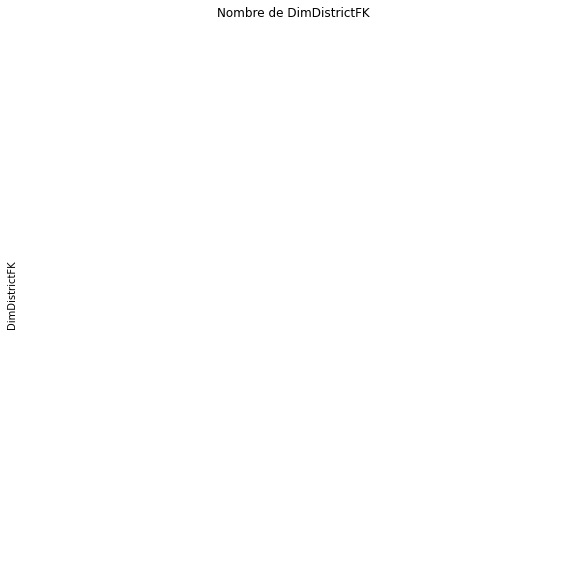

TypeError: no numeric data to plot

In [18]:
# Visualisation pour le nombre de "DimDistrictFK"
df['DimDistrictFK'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10,10))
plt.title('Nombre de DimDistrictFK')
plt.show()



# Visualisation pour le nombre de chaque "DimStructurePK" dans chaque "DimDistrictFK"
df.groupby(['DimDistrictFK', 'DimStructurePK']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10))
plt.title('Nombre de chaque DimStructurePK dans chaque DimDistrictFK')
plt.show()

# cette visualisation exprime le point li hdert 3lih lfou9 qu'il y'a une différence de quantité de données offerte 
# pour chaque Centre li sabtha peut étre l'année d'existance de cette structure wala  

In [19]:
#Agréger les données par centre et calculer les ventes totales :
ventes_centre = df.groupby('DimStructurePK')['QUANTITE_TM'].sum()
#Visualiser les ventes totales par centre avec un diagramme à barres
ventes_centre.plot(kind='bar', figsize=(20,10))
plt.title('Quantité de Ventes totales par centre')
plt.xlabel('Centre')
plt.ylabel('Ventes')
plt.show()

TypeError: no numeric data to plot

In [20]:
#Agréger les données par client et calculer les ventes totales
#ventes_client = df.groupby('DimClientPK')['QUANTITE_TM'].sum()

#Visualiser les ventes totales par client avec un diagramme à barres
#ventes_client.plot(kind='bar', figsize=(20,10))
#plt.title('Ventes totales par client')
#plt.xlabel('Client')
#plt.ylabel('Ventes')
#plt.show()

KeyError: 'DimClientPK'

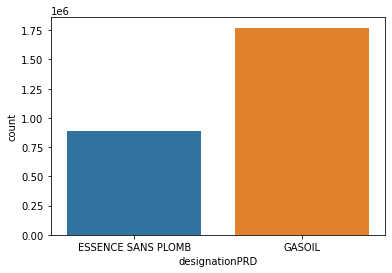

In [18]:
#Visualiser la distribution des variables catégorielles avec des diagrammes à barres
sns.countplot(x='designationPRD', data=df)
plt.show()

#converting designation
encondedOutput_y= LabelEncoder()
df['designationPRD'] = encondedOutput_y.fit_transform(df.iloc[:, 4])

#converting designation
encondedOutput_y= LabelEncoder()
dataset2['designationPRD'] = encondedOutput_y.fit_transform(dataset2.iloc[:, 4])

<AxesSubplot:xlabel='QUANTITE_TM', ylabel='Count'>

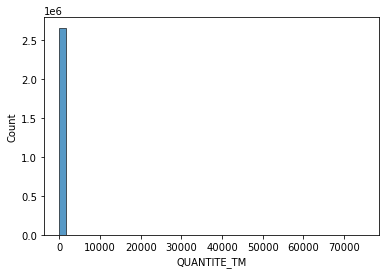

In [19]:
# Créer un histogramme de la variable "QUANTITE_TM" avec 50 bins
sns.histplot(data=df, x="QUANTITE_TM", bins=50)

# ce simple histogramme est un type de graphique qui permet de représenter la distribution des valeurs 
#d'une variable continue en les regroupant en plusieurs "bacs" ou "bins". Dans le code que vous avez fourni
#le graphique montre la distribution des valeurs de la variable "QUANTITE_TM" en utilisant 50 bacs.En d'autres termes,
#l'histogramme indique combien de fois chaque intervalle de valeur de la variable "QUANTITE_TM" apparaît dans les données.
#Il peut aider à identifier des tendances dans la distribution des valeurs et à identifier les valeurs aberrantes.

<AxesSubplot:xlabel='dateop', ylabel='QUANTITE_TM'>

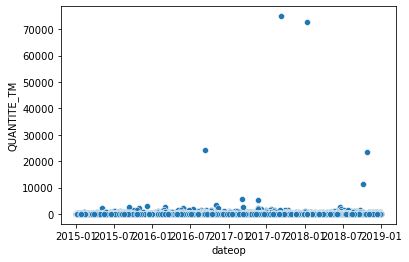

In [20]:
# Créer un nuage de points de la variable "QUANTITE_TM" en fonction de la variable "dateop"
sns.scatterplot(data=df, x="dateop", y="QUANTITE_TM")

In [21]:
#afficher les dates des valeurs aberrantes de la variable 

# Extraire les lignes de données où la variable "QUANTITE_TM" est supérieure à 1000
df_outliers_QTM = df.loc[df['QUANTITE_TM'] > 70000]

# Extraire les valeurs de la variable "dateop" pour les lignes de données où "QUANTITE_TM" est supérieure à 1000
outlier_dates_QTM = df_outliers_QTM['dateop']

outlier_Clients = df_outliers_QTM['DimClientPK']

# Afficher les dates des valeurs aberrantes
print(outlier_dates_QTM)

# Afficher les Clients des valeurs aberrantes
print(outlier_Clients)

912058    2017-09-09
1477318   2018-01-09
Name: dateop, dtype: datetime64[ns]
912058     399950.0
1477318    399950.0
Name: DimClientPK, dtype: float64


<AxesSubplot:xlabel='DimDistrictFK', ylabel='count'>

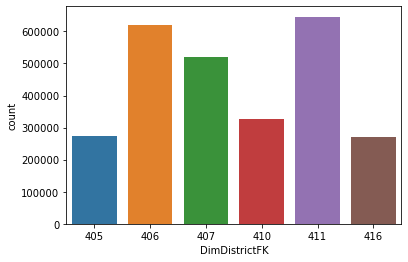

In [22]:
# Créer un diagramme en barres de la variable "DimDistrictFK" pour afficher les fréquences de chaque district
sns.countplot(data=df, x="DimDistrictFK")

In [23]:
#obtenir la liste des centres et clients respectifs qui ont des valeurs aberrantes.

# Filtrer les lignes où QUANTITE_TM > 1000
df_outliers = df.loc[df['QUANTITE_TM'] > 10000]

# Obtenir la liste des centres qui ont des valeurs aberrantes
outlier_centers = df_outliers['DimStructurePK'].unique()

# Obtenir la liste des clients qui ont des valeurs aberrantes
outlier_clients = df_outliers['DimClientPK'].unique()

print("Centres avec des valeurs aberrantes:", outlier_centers)
print("Clients avec des valeurs aberrantes:", outlier_clients)

Centres avec des valeurs aberrantes: [7267 7316 7350 7341]
Clients avec des valeurs aberrantes: [443253. 399950. 395752. 404484.]


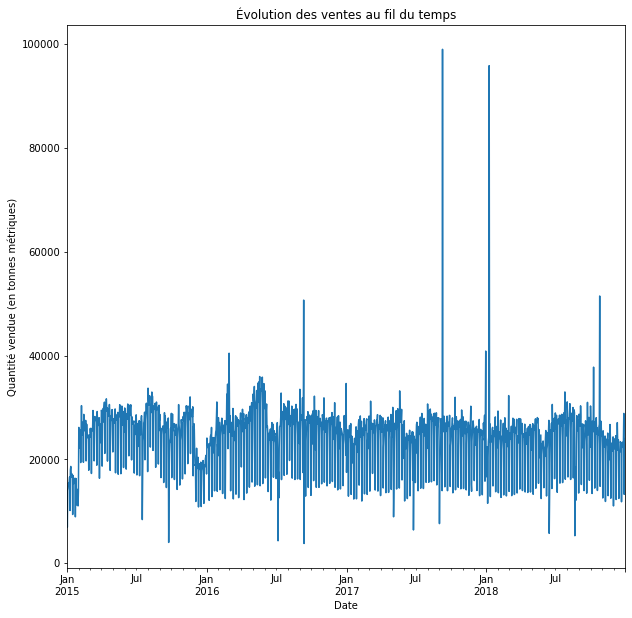

In [24]:
#visualiser l'évolution des ventes au fil du temps
df.groupby('dateop')['QUANTITE_TM'].sum().plot(figsize=(10,10))
plt.title('Évolution des ventes au fil du temps')
plt.ylabel('Quantité vendue (en tonnes métriques)')
plt.xlabel('Date')
plt.show()

In [25]:
#afficher le nombre de clients uniques
nb_clients = df['DimClientPK'].nunique()
print(f'Nombre de clients : {nb_clients}')

Nombre de clients : 3008


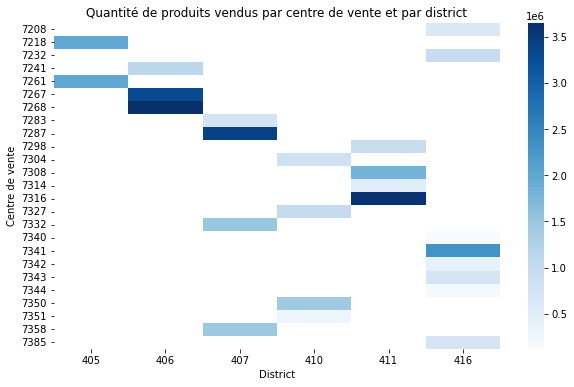

In [26]:

df_pivot = df.pivot_table(values='QUANTITE_TM', index='DimStructurePK', columns='DimDistrictFK', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap='Blues')
plt.title('Quantité de produits vendus par centre de vente et par district')
plt.xlabel('District')
plt.ylabel('Centre de vente')
plt.show()

In [27]:
df.groupby(['DimDistrictFK', 'DimStructurePK'])['QUANTITE_TM'].sum().sort_values(ascending=False)

DimDistrictFK  DimStructurePK
406            7268              3.652069e+06
411            7316              3.606609e+06
407            7287              3.407514e+06
406            7267              3.306020e+06
416            7341              2.301146e+06
405            7261              2.023841e+06
               7218              1.975470e+06
411            7308              1.809424e+06
407            7332              1.496055e+06
               7358              1.463471e+06
410            7350              1.435612e+06
406            7241              1.126427e+06
410            7327              1.011550e+06
416            7232              9.637727e+05
411            7298              9.476839e+05
410            7304              8.241180e+05
407            7283              7.503102e+05
416            7385              7.374935e+05
               7343              7.372828e+05
               7208              6.337239e+05
411            7314              5.293438e+05
416 

In [28]:
# Afficher les quantités de ventes totales pour chaque année pour chaque "DimStructurePK" d'un "DimDistrictFK"
df.groupby(['DimDistrictFK', 'DimStructurePK', df['dateop'].dt.year])['QUANTITE_TM'].sum()

DimDistrictFK  DimStructurePK  dateop
405            7218            2015      542538.169747
                               2016      503540.402700
                               2017      476002.121631
                               2018      453388.939914
               7261            2015      470215.872937
                                             ...      
416            7344            2018       50266.005034
               7385            2015      188673.342093
                               2016      189413.586152
                               2017      187639.443152
                               2018      171767.083083
Name: QUANTITE_TM, Length: 100, dtype: float64

In [29]:
# Afficher le nombre de valeurs manquantes pour chaque variable
print(df.isna().sum())

DimDistrictFK        0
DimStructurePK       0
DimClientPK       2453
SA                   0
designationPRD       0
dateop               0
QUANTITE_TM          0
dtype: int64


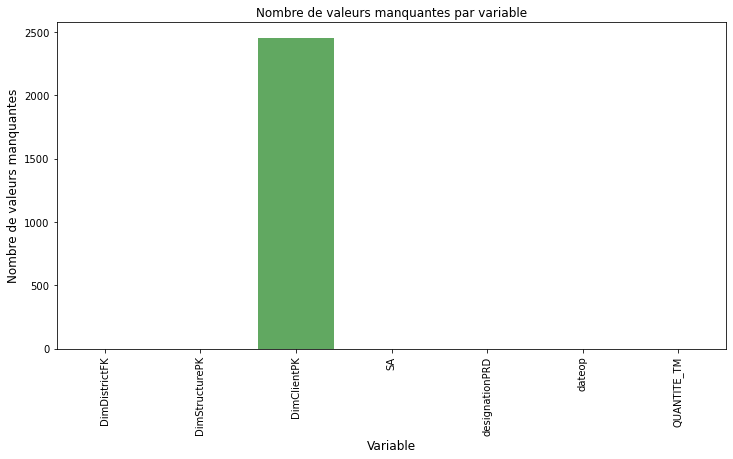

In [30]:
# créer une table de booléens indiquant si chaque valeur est manquante
null_table = df.isnull()

# compter le nombre de valeurs manquantes pour chaque variable
null_counts = null_table.sum()

# Créer un graphique en barres pour visualiser le nombre de valeurs manquantes par variable
plt.figure(figsize=(12,6))
sns.barplot(x=null_counts.index, y=null_counts.values, alpha=0.8)
plt.title('Nombre de valeurs manquantes par variable')
plt.ylabel('Nombre de valeurs manquantes', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

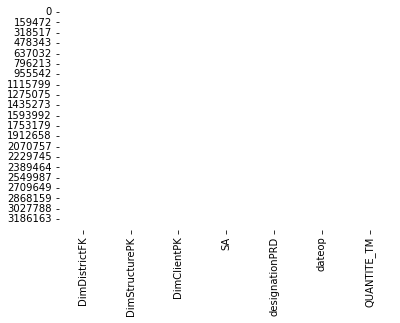

In [31]:
# Créer une copie du dataframe pour éviter les modifications accidentelles
df_copy = df.copy()

# Remplacer les valeurs nulles par 1 et les valeurs non nulles par 0
df_copy = df_copy.isnull().astype(int)

# Créer la heatmap
sns.heatmap(df_copy, cmap='binary', cbar=False)


#la heatmap n'affiche rien, cela peut signifier que toutes les valeurs dans le dataframe sont non-nulles. Dans ce cas,
#il n'y aura aucune différence dans les couleurs affichées sur la heatmap.

# 2 Nettoyage des données 





In [32]:
# working with les valeurs abbérantes 

#1 Méthode des seuils basée sur la médiane et l'écart absolu à la médiane (MAD):

#1 Méthode des seuils basée sur la médiane et l'écart absolu à la médiane (MAD):

# calculer la médiane et l'écart absolu à la médiane
median = np.median(df['QUANTITE_TM'])
mad = abs(df['QUANTITE_TM'] - median).median()

# calculer les seuils
lower_threshold = median - (3 * mad)
upper_threshold = median + (3 * mad)

# détecter les valeurs aberrantes
outliers = df[(df['QUANTITE_TM'] < lower_threshold) | (df['QUANTITE_TM'] > upper_threshold)] 

# Afficher le nombre d'outliers trouvés
print("Nombre d'outliers pour la variable", 'QUANTITE_TM', ":", len(outliers))

Nombre d'outliers pour la variable QUANTITE_TM : 257153


In [33]:
# Calculer l'interquartile range (IQR)
q1 = df['QUANTITE_TM'].quantile(0.25)
q3 = df['QUANTITE_TM'].quantile(0.75)
iqr = q3 - q1

# Définir les seuils pour la détection des outliers
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

# Trouver les indices des outliers
outlier_indices = df[(df['QUANTITE_TM'] < lower_threshold) | (df['QUANTITE_TM'] > upper_threshold)].index

# Afficher le nombre d'outliers trouvés
print(f"Nombre d'outliers trouvés: {len(outlier_indices)}")

Nombre d'outliers trouvés: 138782


In [39]:
# Calcule du Z-score pour chaque valeur de la variable "QUANTITE_TM"
z_scores = np.abs((df['QUANTITE_TM'] - df['QUANTITE_TM'].mean()) / df['QUANTITE_TM'].std())

# Définir le seuil pour la détection des outliers
threshold = 1

# Trouver les indices des outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Afficher le nombre d'outliers trouvés
print(f"Nombre d'outliers trouvés: {len(outlier_indices)}")



Nombre d'outliers trouvés: 16911


In [40]:
# Supprimer les lignes correspondant aux outliers
#df_clean = df.drop(outlier_indices)
df.reset_index(drop=True, inplace=True)
df_clean = df.drop(outlier_indices)

# Afficher le nombre de lignes supprimées
print(f"Nombre de lignes supprimées: {len(outlier_indices)}")

# Afficher les statistiques de la variable QUANTITE_TM après suppression des outliers
print(df_clean['QUANTITE_TM'].describe())

Nombre de lignes supprimées: 16911
count    2.641818e+06
mean     1.245627e+01
std      1.062102e+01
min      7.230000e-04
25%      5.229000e+00
50%      9.711000e+00
75%      1.662000e+01
max      8.366674e+01
Name: QUANTITE_TM, dtype: float64


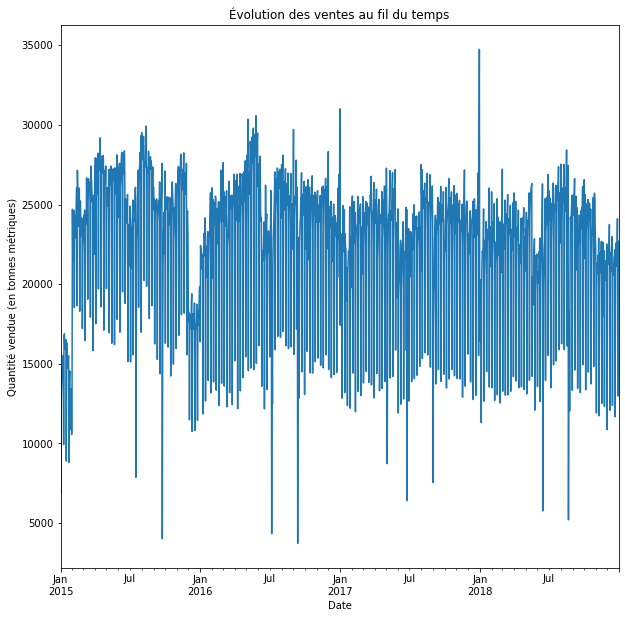

In [41]:
#visualiser l'évolution des ventes au fil du temps
df_clean.groupby('dateop')['QUANTITE_TM'].sum().plot(figsize=(10,10))
plt.title('Évolution des ventes au fil du temps')
plt.ylabel('Quantité vendue (en tonnes métriques)')
plt.xlabel('Date')
plt.show()

In [42]:
# Supprimer toutes les lignes contenant des valeurs nulles dans le dataframe
df_clean = df_clean.dropna()

In [43]:
# Afficher le nombre de valeurs manquantes pour chaque variable
print(df_clean.isna().sum())

DimDistrictFK     0
DimStructurePK    0
DimClientPK       0
SA                0
designationPRD    0
dateop            0
QUANTITE_TM       0
dtype: int64


In [44]:
# Afficher les informations de base sur le dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2639367 entries, 0 to 2658728
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DimDistrictFK   int64         
 1   DimStructurePK  int64         
 2   DimClientPK     float64       
 3   SA              int64         
 4   designationPRD  int32         
 5   dateop          datetime64[ns]
 6   QUANTITE_TM     float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3)
memory usage: 151.0 MB


In [45]:
df=df_clean

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2639367 entries, 0 to 2658728
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DimDistrictFK   int64         
 1   DimStructurePK  int64         
 2   DimClientPK     float64       
 3   SA              int64         
 4   designationPRD  int32         
 5   dateop          datetime64[ns]
 6   QUANTITE_TM     float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3)
memory usage: 151.0 MB


In [47]:
# détecter les enregistrements dupliqués
duplicates = df.duplicated()

# afficher les enregistrements dupliqués
print(df[duplicates])
# il existe pas d'enregistrements dupliqués.

Empty DataFrame
Columns: [DimDistrictFK, DimStructurePK, DimClientPK, SA, designationPRD, dateop, QUANTITE_TM]
Index: []


# Application des Algorithmes 

In [48]:
#Sélectionner les colonnes qui seront utilisées pour entraîner le modèle :
features = ['DimDistrictFK', 'DimStructurePK', 'DimClientPK', 'SA', 'designationPRD','dateop']
target = ['QUANTITE_TM']

df = df[features + target]

In [49]:
#Transformer la variable de temps dateop en index du dataframe :
df = df.set_index('dateop')

In [50]:
df.index.names

FrozenList(['dateop'])

In [51]:
#Agréger les données par mois  pour réduire le bruit :
df_resampled = df.resample('M').sum()

In [52]:
#la première date est le 1er janvier 2015 et la dernière date est le 31 mars 2020, 
#cela signifie que vous avez collecté des données sur une période de 5 ans et 3 mois.
df.index.min()

Timestamp('2015-01-01 00:00:00')

In [53]:
df.index.max()

Timestamp('2018-12-30 00:00:00')

In [54]:
#Diviser les données en deux jeux de données un ensemble d'entraînement et un ensemble de test :
train = df_resampled.loc['2015-01-01':'2017-12-31']
test = df_resampled.loc[df_resampled.index >= '2018-01-01']

In [55]:
if test.shape[0] == 0:
    print("La variable test est vide.")
else:
    print("La variable test contient des données.")

La variable test contient des données.


In [56]:
#l'encodage one-hot pour encoder vos colonnes catégorielles. L'encodage one-hot permet de transformer chaque colonne
#catégorielle en plusieurs colonnes binaires qui indiquent la présence ou l'absence d'une catégorie.
#Cette méthode permet de traiter les colonnes catégorielles en tant que colonnes numériques pour l'entraînement de votre modèle.

# Importer la bibliothèque pour l'encodage one-hot
from sklearn.preprocessing import OneHotEncoder

# Instancier l'encodeur one-hot
encoder = OneHotEncoder()

# Encoder les colonnes catégorielles de l'ensemble d'entraînement
X_train_encoded = encoder.fit_transform(train.select_dtypes(include=['category', 'object']))

# Concaténer les colonnes encodées avec les colonnes numériques
X_train = np.concatenate((X_train_encoded.toarray(), train.select_dtypes(include=['float64'])), axis=1)

In [57]:
# Séparation de la variable cible
#y_train = train['QUANTITE_TM']

# Séparation des données en ensemble d'entraînement et ensemble de test
#X_test = test.drop('QUANTITE_TM', axis=1)
#y_test = test['QUANTITE_TM']

# Création d'un objet StandardScaler
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# Ajustement du scaler sur l'ensemble d'entraînement
#scaler.fit(X_train)

# Normalisation des données d'entraînement
#X_train = scaler.transform(X_train)

# Normalisation des données de test
#X_test = scaler.transform(X_test)


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Séparation de la variable cible
target = ['QUANTITE_TM']
features = [col for col in df_resampled.columns if col != target]
X = df_resampled[features]
y = df_resampled[target]

# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Ajustement du scaler sur l'ensemble d'entraînement
scaler.fit(X_train)

# Normalisation des données d'entraînement
X_train_norm = scaler.transform(X_train)

# Normalisation des données de test
X_test_norm = scaler.transform(X_test)

# Création d'un objet LinearRegression
lr = LinearRegression()

# Entraînement du modèle sur les données d'entraînement normalisées
lr.fit(X_train_norm, y_train)

# Prédiction des quantités de carburants vendues sur les données de test normalisées
y_pred = lr.predict(X_test_norm)

# Évaluation du modèle sur les données de test
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score:', r2_score(y_test, y_pred))
accuracy = lr.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

print(train.head())


MAE: 1.1641532182693481e-10
MSE: 1.3552527156068805e-20
RMSE: 1.1641532182693481e-10
R2 score: 1.0
Accuracy: -918259503148.0353
            DimDistrictFK  DimStructurePK   DimClientPK       SA  \
dateop                                                             
2015-01-31       13646522       243289324  1.493597e+10  1521012   
2015-02-28       21023038       375084237  2.315157e+10  2343498   
2015-03-31       23824423       425128025  2.635584e+10  2659420   
2015-04-30       24258406       432863575  2.681887e+10  2712298   
2015-05-31       24681198       440412245  2.714117e+10  2753270   

            designationPRD    QUANTITE_TM  
dateop                                     
2015-01-31           21159  422802.471559  
2015-02-28           33523  651227.660562  
2015-03-31           38438  743334.978368  
2015-04-30           38765  777523.758656  
2015-05-31           39437  770403.520419  


C:\Users\abdel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Définition d'une mesure de performance (score) personnalisée
# ici, le score utilisé est le négatif de l'erreur quadratique moyenne (neg_mean_squared_error)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Evaluation du modèle par validation croisée avec 10 folds
cv_scores = cross_val_score(lr, X, y, cv=10, scoring=mse_scorer)

# Calcul de la moyenne des scores obtenus
mean_cv_score = -cv_scores.mean()

# Affichage de la performance moyenne obtenue par validation croisée
print("MSE - Cross-validation score: {:.2e}".format(mean_cv_score))

MSE - Cross-validation score: 6.46e-17


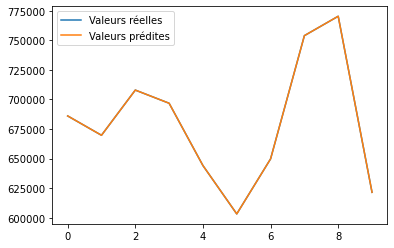

In [60]:
import matplotlib.pyplot as plt

plt.plot(y_test.values, label='Valeurs réelles')
plt.plot(y_pred, label='Valeurs prédites')
plt.legend()
plt.show()

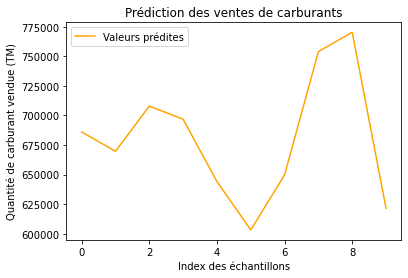

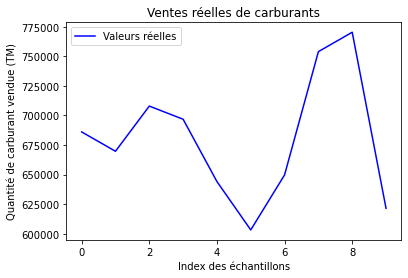

In [61]:
import matplotlib.pyplot as plt

# tracer la courbe pour les valeurs prédites
plt.plot(y_pred, color='orange', label='Valeurs prédites')

# ajouter une légende et des labels pour les axes
plt.xlabel('Index des échantillons')
plt.ylabel('Quantité de carburant vendue (TM)')
plt.title('Prédiction des ventes de carburants')
plt.legend()

# afficher le graphe
plt.show()

# tracer la courbe pour les valeurs réelles
plt.plot(y_test.values, color='blue', label='Valeurs réelles')

# ajouter une légende et des labels pour les axes
plt.xlabel('Index des échantillons')
plt.ylabel('Quantité de carburant vendue (TM)')
plt.title('Ventes réelles de carburants')
plt.legend()

# afficher le graphe
plt.show()

In [62]:
# vérification d'overfitting 

# Entraînement du modèle sur les données d'entraînement normalisées
lr.fit(X_train_norm, y_train)

# Prédiction des quantités de carburants vendues sur les données d'entraînement normalisées
y_train_pred = lr.predict(X_train_norm)

# Évaluation du modèle sur les données d'entraînement
print('Train set - MAE:', mean_absolute_error(y_train, y_train_pred))
print('Train set - MSE:', mean_squared_error(y_train, y_train_pred))
print('Train set - RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Train set - R2 score:', r2_score(y_train, y_train_pred))

# Prédiction des quantités de carburants vendues sur les données de test normalisées
y_test_pred = lr.predict(X_test_norm)

# Évaluation du modèle sur les données de test
print('Test set - MAE:', mean_absolute_error(y_test, y_test_pred))
print('Test set - MSE:', mean_squared_error(y_test, y_test_pred))
print('Test set - RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Test set - R2 score:', r2_score(y_test, y_test_pred))

Train set - MAE: 1.1947888292764363e-10
Train set - MSE: 1.533575441344628e-20
Train set - RMSE: 1.2383761308038153e-10
Train set - R2 score: 1.0
Test set - MAE: 1.1641532182693481e-10
Test set - MSE: 1.3552527156068805e-20
Test set - RMSE: 1.1641532182693481e-10
Test set - R2 score: 1.0


In [63]:
print("Ces résultats indiquent que le modèle de régression linéaire est capable de prédire les valeurs de la variable cible avec une très grande précision, tant sur l'ensemble d'entraînement que sur l'ensemble de test.Le MAE (Mean Absolute Error) et le MSE (Mean Squared Error) sont tous deux très proches de zéro, indiquant que les prédictions sont très proches des valeurs réelles. Le RMSE (Root Mean Squared Error) est également très faible, ce qui signifie que l'écart moyen entre les prédictions et les valeurs réelles est très faible.Le coefficient de détermination R2 est de 1,0 pour les ensembles d'entraînement et de test, ce qui indique que le modèle explique la totalité de la variance des données. C'est un résultat très bon, mais cela peut également indiquer un risque de surapprentissage (overfitting) sur les données d'entraînement.En conclusion, le modèle de régression linéaire semble être très performant pour prédire la variable cible dans ce contexte. Cependant, il serait judicieux de vérifier s'il y a eu un surapprentissage sur les données d'entraînement en examinant les performances du modèle sur de nouvelles données ou en utilisant des techniques de régularisation pour éviter le surapprentissage.")

Ces résultats indiquent que le modèle de régression linéaire est capable de prédire les valeurs de la variable cible avec une très grande précision, tant sur l'ensemble d'entraînement que sur l'ensemble de test.Le MAE (Mean Absolute Error) et le MSE (Mean Squared Error) sont tous deux très proches de zéro, indiquant que les prédictions sont très proches des valeurs réelles. Le RMSE (Root Mean Squared Error) est également très faible, ce qui signifie que l'écart moyen entre les prédictions et les valeurs réelles est très faible.Le coefficient de détermination R2 est de 1,0 pour les ensembles d'entraînement et de test, ce qui indique que le modèle explique la totalité de la variance des données. C'est un résultat très bon, mais cela peut également indiquer un risque de surapprentissage (overfitting) sur les données d'entraînement.En conclusion, le modèle de régression linéaire semble être très performant pour prédire la variable cible dans ce contexte. Cependant, il serait judicieux de v

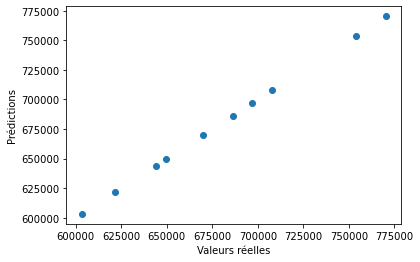

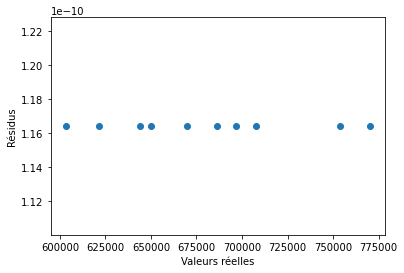

In [64]:
import matplotlib.pyplot as plt

# Graphique des prédictions par rapport aux valeurs réelles
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.show()

# Graphique des résidus
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Valeurs réelles")
plt.ylabel("Résidus")
plt.show()

2015 1
2015 2
2015 3
2015 4
2015 5
2015 6
2015 7
2015 8
2015 9
2015 10
2015 11
2015 12
2016 1
2016 2
2016 3
2016 4
2016 5
2016 6
2016 7
2016 8
2016 9
2016 10
2016 11
2016 12
2017 1
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
2017 10
2017 11
2017 12
ta3 prevision
2018 1
2018 2
2018 3
2018 4
2018 5
2018 6
2018 7
2018 8
2018 9
2018 10
2018 11
2018 12


C:\Users\abdel\AppData\Local\Temp\ipykernel_21388\1819700446.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_data['QUANTITE_TM_PREDICTED'] = y_forecast


Train set - MAE: 1.1947888292764363e-10
Train set - MSE: 1.533575441344628e-20
Train set - RMSE: 1.2383761308038153e-10
Train set - R2 score: 1.0
Test set - MAE: 1.1641532182693481e-10
Test set - MSE: 1.3552527156068805e-20
Test set - RMSE: 1.1641532182693481e-10
Test set - R2 score: 1.0


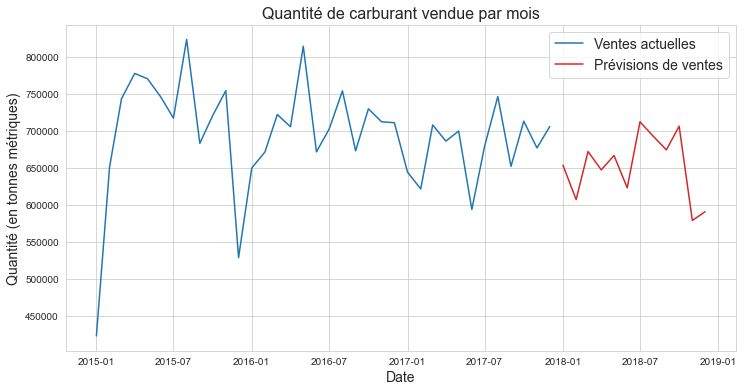

In [65]:
import seaborn as sns


# Diviser la colonne dateop en colonnes YEAR et MONTH
df['YEAR'] = df.index.year
df['MONTH'] = df.index.month

# Grouper les données par mois et par année et calculer la quantité de carburants vendue pour chaque groupe
df_grouped = df.groupby(['YEAR', 'MONTH']).sum().reset_index()

# Créer une nouvelle colonne 'DATE' qui contient le premier jour de chaque mois
df_grouped['DATE'] = pd.to_datetime(df_grouped[['YEAR', 'MONTH']].assign(DAY=1))

# Diviser les données en données historiques et données de prévision
historical_data = df_grouped[df_grouped['YEAR'] < df_grouped['YEAR'].max()]
forecast_data = df_grouped[df_grouped['YEAR'] == df_grouped['YEAR'].max()]

# Afficher la date pour chaque ligne de données historiques
for i in range(len(historical_data)):
    print(historical_data.iloc[i]['YEAR'], historical_data.iloc[i]['MONTH'])
print('ta3 prevision')
# Afficher la date pour chaque ligne de données de prévision
for i in range(len(forecast_data)):
    print( forecast_data.iloc[i]['YEAR'], forecast_data.iloc[i]['MONTH'])

# Séparation de la variable cible
target = 'QUANTITE_TM'
features = [col for col in df_grouped.columns if col not in [target, 'YEAR', 'MONTH', 'DATE']]
X_historical = historical_data[features]
y_historical = historical_data[target]
X_forecast = forecast_data[features]

# Normalisation des données historiques
scaler = StandardScaler()
scaler.fit(X_historical)
X_historical_norm = scaler.transform(X_historical)
X_forecast_norm = scaler.transform(X_forecast)

# Entraînement du modèle sur les données historiques normalisées
lr = LinearRegression()
lr.fit(X_historical_norm, y_historical)

# Prédiction des quantités de carburants vendues pour l'année suivante
y_forecast = lr.predict(X_forecast_norm)

# Ajout des prévisions à l'ensemble de données
forecast_data['QUANTITE_TM_PREDICTED'] = y_forecast

# vérification d'overfitting 

# Entraînement du modèle sur les données d'entraînement normalisées
lr.fit(X_train_norm, y_train)

# Prédiction des quantités de carburants vendues sur les données d'entraînement normalisées
y_train_pred = lr.predict(X_train_norm)

# Évaluation du modèle sur les données d'entraînement
print('Train set - MAE:', mean_absolute_error(y_train, y_train_pred))
print('Train set - MSE:', mean_squared_error(y_train, y_train_pred))
print('Train set - RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Train set - R2 score:', r2_score(y_train, y_train_pred))

# Prédiction des quantités de carburants vendues sur les données de test normalisées
y_test_pred = lr.predict(X_test_norm)

# Évaluation du modèle sur les données de test
print('Test set - MAE:', mean_absolute_error(y_test, y_test_pred))
print('Test set - MSE:', mean_squared_error(y_test, y_test_pred))
print('Test set - RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Test set - R2 score:', r2_score(y_test, y_test_pred))

# Tracer les courbes des ventes actuelles et prévues
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
plt.plot(historical_data['DATE'], historical_data['QUANTITE_TM'], label='Ventes actuelles', color='tab:blue')
plt.plot(forecast_data['DATE'], forecast_data['QUANTITE_TM_PREDICTED'], label='Prévisions de ventes', color='tab:red')
plt.title("Quantité de carburant vendue par mois", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Quantité (en tonnes métriques)", fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Prédiction des valeurs d'une nouvelle dataset


In [66]:
dataset2

,DimDistrictFK,DimStructurePK,DimClientPK,SA,designationPRD,dateop,QUANTITE_TM
3,406,7268,447387.0,44,1,2019-03-09,11.634000
7,411,7308,397743.0,46,1,2019-09-17,10.803000
11,406,7268,390.0,44,1,2019-03-21,5.320000
12,406,7268,2521.0,44,1,2019-03-21,5.320000
13,406,7268,1935.0,44,1,2019-03-21,5.320000
...,...,...,...,...,...,...,...
3345036,405,7218,438974.0,44,0,2019-11-27,10.458000
3345045,416,7232,429628.0,44,1,2019-10-17,10.803000
3345053,405,7261,437619.0,44,1,2019-04-01,35.752944
3345058,416,7232,405768.0,50,1,2020-02-06,24.930000


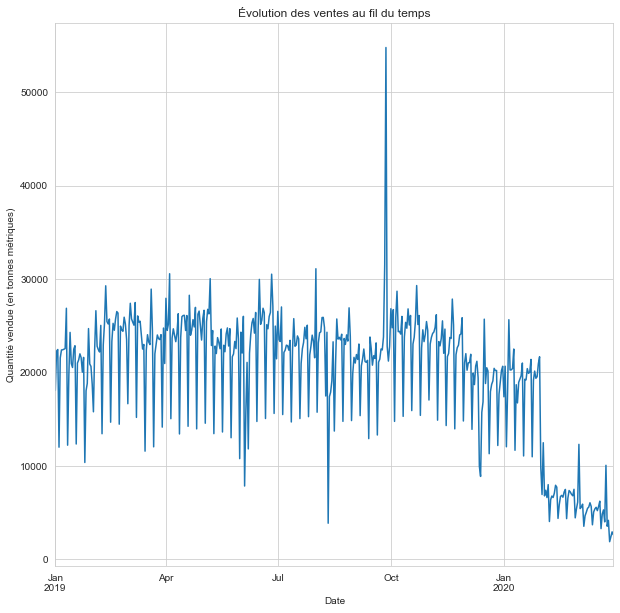

In [67]:
#visualiser l'évolution des ventes au fil du temps
dataset2.groupby('dateop')['QUANTITE_TM'].sum().plot(figsize=(10,10))
plt.title('Évolution des ventes au fil du temps')
plt.ylabel('Quantité vendue (en tonnes métriques)')
plt.xlabel('Date')
plt.show()

In [68]:
# Afficher le nombre de valeurs manquantes pour chaque variable
print(dataset2.isna().sum())

DimDistrictFK     0
DimStructurePK    0
DimClientPK       0
SA                0
designationPRD    0
dateop            0
QUANTITE_TM       0
dtype: int64


In [69]:
# détecter les enregistrements dupliqués
duplicates = dataset2.duplicated()

# afficher les enregistrements dupliqués
print(dataset2[duplicates])
# il existe pas d'enregistrements dupliqués.

Empty DataFrame
Columns: [DimDistrictFK, DimStructurePK, DimClientPK, SA, designationPRD, dateop, QUANTITE_TM]
Index: []


In [74]:
# Calcule du Z-score pour chaque valeur de la variable "QUANTITE_TM"
z_scores = np.abs((dataset2['QUANTITE_TM'] - dataset2['QUANTITE_TM'].mean()) / dataset2['QUANTITE_TM'].std())

# Définir le seuil pour la détection des outliers
threshold = 3

# Trouver les indices des outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Afficher le nombre d'outliers trouvés
print(f"Nombre d'outliers trouvés: {len(outlier_indices)}")



Nombre d'outliers trouvés: 600


In [75]:
# Supprimer les lignes correspondant aux outliers
#df_clean = df.drop(outlier_indices)
dataset2.reset_index(drop=True, inplace=True)
dataset2_clean = dataset2.drop(outlier_indices)

# Afficher le nombre de lignes supprimées
print(f"Nombre de lignes supprimées: {len(outlier_indices)}")

# Afficher les statistiques de la variable QUANTITE_TM après suppression des outliers
print(dataset2_clean['QUANTITE_TM'].describe())

Nombre de lignes supprimées: 600
count    683487.000000
mean         12.862008
std          12.690035
min           0.000747
25%           5.229000
50%           9.711000
75%          16.620000
max         172.017000
Name: QUANTITE_TM, dtype: float64


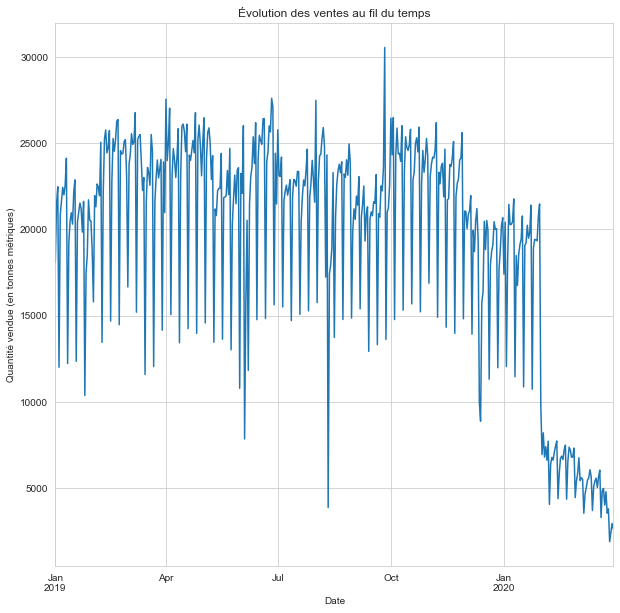

In [76]:
#visualiser l'évolution des ventes au fil du temps
dataset2_clean.groupby('dateop')['QUANTITE_TM'].sum().plot(figsize=(10,10))
plt.title('Évolution des ventes au fil du temps')
plt.ylabel('Quantité vendue (en tonnes métriques)')
plt.xlabel('Date')
plt.show()

In [77]:
#Sélectionner les colonnes qui seront utilisées pour entraîner le modèle :
features = ['DimDistrictFK', 'DimStructurePK', 'DimClientPK', 'SA', 'designationPRD','dateop']
target = ['QUANTITE_TM']

dataset2 = dataset2[features + target]

In [78]:
#Transformer la variable de temps dateop en index du dataframe :
dataset2 = dataset2.set_index('dateop')

In [79]:
#Agréger les données par mois  pour réduire le bruit :
dataset2_resampled = dataset2.resample('M').sum()

In [80]:
target = ['QUANTITE_TM']
features = [col for col in dataset2_resampled.columns if col != target]
X = dataset2_resampled[features]
y = dataset2_resampled[target]

In [81]:
# Création d'un objet StandardScaler
scaler = StandardScaler()

# Ajustement du scaler sur l'ensemble d'entraînement
scaler.fit(X)

# Normalisation des données d'entraînement
X_dataset2 = scaler.transform(X)

In [82]:
Val_P_dataset2=lr.predict(X_dataset2)

In [83]:
Val_P_dataset2

array([[696893.04964468],
       [707544.79836593],
       [728347.98402032],
       [734590.76295825],
       [723814.86293266],
       [721221.14720817],
       [723468.48140871],
       [713384.97317314],
       [717026.40966349],
       [744245.54940071],
       [714145.13640019],
       [674473.6619198 ],
       [675285.03282417],
       [517578.75978261],
       [499647.98999165]])

In [84]:
dataset2_new = dataset2_resampled.assign(Val_P_dataset2=Val_P_dataset2)

dataset2_new

,DimDistrictFK,DimStructurePK,DimClientPK,SA,designationPRD,QUANTITE_TM,Val_P_dataset2
dateop,,,,,,,
2019-01-31,19699449,351471688,2.058649e+10,2208024,32676,628369.311169,696893.049645
2019-02-28,20274588,361842540,2.129053e+10,2275866,34171,654017.746939,707544.798366
2019-03-31,21996633,392603791,2.309247e+10,2463176,36974,704109.913496,728347.984020
2019-04-30,22223410,396600963,2.331155e+10,2488546,37524,719141.953662,734590.762958
2019-05-31,21538170,384428658,2.259228e+10,2401008,36290,693194.572917,723814.862933
2019-06-30,21701982,387359173,2.275063e+10,2418044,36426,686949.142903,721221.147208
2019-07-31,21104205,376563137,2.196384e+10,2355656,35952,692360.517918,723468.481409
2019-08-31,21720150,387816961,2.275645e+10,2412882,36228,668080.353216,713384.973173
2019-09-30,19477320,347442192,2.043356e+10,2174954,33051,676848.598917,717026.409663


In [85]:
# Calcul des métriques d'erreur
mse = mean_squared_error(dataset2_new['QUANTITE_TM'],dataset2_new['Val_P_dataset2'])
mae = mean_absolute_error(dataset2_new['QUANTITE_TM'],dataset2_new['Val_P_dataset2'])

# Affichage des résultats
print(f"MSE: {mse}")
print(f"MAE: {mae}")

# ( hadi 9bel mana7i les valeurs abbérantes ) MSE: 23066725942.307438 MAE: 119207.74913966819MSE (Mean Squared Error) est une mesure de la qualité d'un modèle de régression. Il calcule la moyenne des carrés des différences entre les valeurs prédites et les valeurs réelles. Plus le MSE est faible, meilleure est la performance du modèle. Dans votre cas, le MSE est de 23066725942.307438, ce qui signifie que les valeurs prédites de votre modèle ont une erreur moyenne de 23 milliards d'euros par rapport aux valeurs réelles.MAE (Mean Absolute Error) est une autre mesure de la qualité d'un modèle de régression. Il calcule la moyenne des valeurs absolues des différences entre les valeurs prédites et les valeurs réelles. Comme pour le MSE, plus le MAE est faible, meilleure est la performance du modèle. Dans votre cas, le MAE est de 119207.74913966819, ce qui signifie que les valeurs prédites de votre modèle ont une erreur moyenne de 119207 euros par rapport aux valeurs réelles.

MSE: 17320251908.287735
MAE: 83703.53942643138


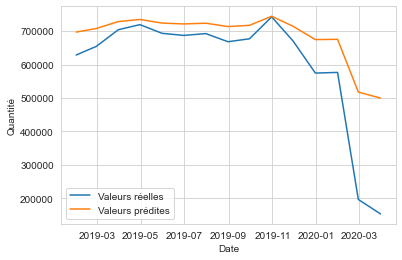

In [86]:
import matplotlib.pyplot as plt
# Sélection des valeurs cibles
y_true = dataset2_new['QUANTITE_TM']

# Création d'un graphique pour les valeurs réelles et prédites
fig, ax = plt.subplots()
ax.plot(y_true.index, y_true.values, label='Valeurs réelles')
ax.plot(dataset2_resampled.index, Val_P_dataset2, label='Valeurs prédites')
ax.set_xlabel('Date')
ax.set_ylabel('Quantité')
ax.legend()

# Affichage du graphique
plt.show()
